CPI over time
- https://beta.bls.gov/dataQuery/find?st=0&r=20&s=popularity%3AD&fq=survey:[cu]&more=0
- https://www.bls.gov/regions/west/factsheet/consumer-price-index-data-tables.htm
- https://data.bls.gov/timeseries/CUURS49ESA0
- https://www.bls.gov/regions/west/factsheet/consumer-price-index-data-tables.htm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

<ipython-input-2-37777429a894>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
"""CPI_df = pd.read_csv(DATA_DIR / "CPI" / "us-average-all-items.csv")
CPI_df["Date"] = [
    float(row.Year) if row.Period == "S01" else float(row.Year) + 0.5
]
CPI_df['US_averages'] = CPI_df['Value']
CPI_df[:3]"""

'CPI_df = pd.read_csv(DATA_DIR / "CPI" / "us-average-all-items.csv")\nCPI_df["Date"] = [\n    float(row.Year) if row.Period == "S01" else float(row.Year) + 0.5\n    for idx, row in CPI_df.iterrows()\n]\nCPI_df[\'US_averages\'] = CPI_df[\'Value\']\nCPI_df[:3]'

In [4]:
cities = [
    "boston",
    "new-york",
    "san-diego",
    "san-francisco",
    "chicago",
    "pittsburgh",
    "baltimore",
    "portland",
    "houston",
]

In [5]:
all_dfs = []
for city in ["us-average"]+ cities:
    city_df = pd.read_csv(DATA_DIR / "CPI" / "{}-all-items.csv".format(city))
    city_df["CITY"] = city
    city_df["CPI"] = city_df["Value"]
    all_dfs.append(city_df)
CPI_all_df_stacked = pd.concat(all_dfs)
CPI_all_df = (
    CPI_all_df_stacked[["Year", "CPI", "CITY"]]
    .groupby(["Year", "CITY"])
    .describe()[["CPI"]]["CPI"]["mean"]
)
CPI_all_df = pd.DataFrame(CPI_all_df).reset_index()
CPI_all_df = CPI_all_df.pivot(index="Year", columns="CITY", values="mean")
CPI_all_df[:3]

CITY,baltimore,boston,chicago,houston,new-york,pittsburgh,portland,san-diego,san-francisco,us-average
Year,,,,,,,,,,
1984,104.55,104.70,103.80,102.70,104.80,104.55,102.85,104.75,104.00,103.883333
1985,108.20,109.40,107.75,104.90,108.70,106.90,106.70,110.35,108.35,107.566667
1986,110.90,112.25,110.00,103.95,112.25,108.25,108.20,113.50,111.65,109.608333


In [6]:
CPI_all_df_stacked[:3]

,Series ID,Year,Period,Label,Value,CITY,CPI
0,CUUR0000SA0,1984,M01,1984 Jan,101.9,us-average,101.9
1,CUUR0000SA0,1984,M02,1984 Feb,102.4,us-average,102.4
2,CUUR0000SA0,1984,M03,1984 Mar,102.6,us-average,102.6


In [7]:
CPI_relative_average = pd.DataFrame(CPI_all_df.values.T - CPI_all_df['us-average'].values).T
CPI_relative_average.columns = CPI_all_df.columns
CPI_relative_average.index = CPI_all_df.index
CPI_relative_average= CPI_relative_average.reset_index()
CPI_relative_average[:3]

CITY,Year,baltimore,boston,chicago,houston,new-york,pittsburgh,portland,san-diego,san-francisco,us-average
0,1984,0.666667,0.816667,-0.083333,-1.183333,0.916667,0.666667,-1.033333,0.866667,0.116667,0.0
1,1985,0.633333,1.833333,0.183333,-2.666667,1.133333,-0.666667,-0.866667,2.783333,0.783333,0.0
2,1986,1.291667,2.641667,0.391667,-5.658333,2.641667,-1.358333,-1.408333,3.891667,2.041667,0.0


In [132]:
CPI_all_df = CPI_all_df.reset_index()

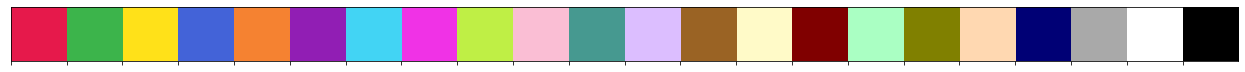

In [146]:
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000']
sns.palplot(colors)

Text(0, 0.5, 'CPI relative to national average')

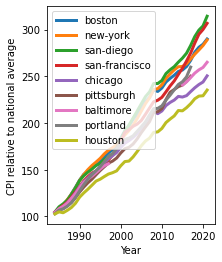

In [133]:
fig, ax = plt.subplots(figsize=(3, 4))
for city in cities:
    ax.plot(
        CPI_all_df.Year.values,
        CPI_all_df[city].values,
        label=city,
        lw=3,
    )
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("CPI relative to national average")

In [134]:
import seaborn as sns

In [141]:
pal = sns.color_palette('tab10', 9)
pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)]

In [142]:
len(cities)

9

In [143]:
city_color_df = {city:p for city, p in zip(cities,pal)}

(1984.0, 2020.0)

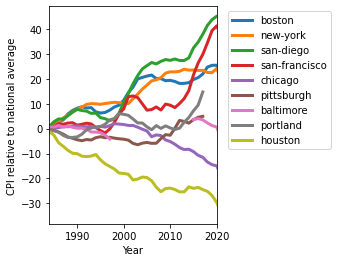

In [145]:
fig, ax = plt.subplots(figsize=(3, 4))
for city in cities:
    ax.plot(
        CPI_relative_average.Year.values,
        CPI_relative_average[city].values,
        label=city,
        lw=3,
        color = city_color_df[city]
    )
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("CPI relative to national average")
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlim([1984, 2020])

In [ ]:
# Since 1982, economic regions with high postdoc populations have grown in price at a greater rate than the rest of the United states